In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("./weatherAUS.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [21]:
def ynToInt(val):
    return 0 if val == "No" else 1
df['RainToday'] = df['RainToday'].apply(ynToInt)
df['RainTomorrow'] = df['RainTomorrow'].apply(ynToInt)

def dirToInt(dir):
    if pd.isna(dir):
        return dir
    dirMap = {
        "N":0,
        "NNE": 1,
        "NE": 2,
        "ENE":3,
        "E": 4,
        "ESE": 5,
        "SE":6,
        "SSE":7,
        "S":8,
        "SSW":9,
        "SW":10,
        "WSW":11,
        "W":12,
        "WNW":13,
        "NW":14,
        "NNW":15,
    }
    return dirMap[dir]

df['WindGustDir'] = df['WindGustDir'].apply(dirToInt)
df['WindDir9am'] = df['WindDir9am'].apply(dirToInt)
df['WindDir3pm'] = df['WindDir3pm'].apply(dirToInt)

In [28]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [40]:
# split data by time
df_morn = df.drop(columns=["WindDir3pm", "WindSpeed3pm", "Humidity3pm", "Pressure3pm", "Cloud3pm", "Temp3pm"])
df_morn = df_morn.rename(columns={"WindDir9am": "WindDir", "WindSpeed9am": "WindSpeed", "Humidity9am":"Humidity", "Pressure9am":"Pressure", "Cloud9am":"Cloud", "Temp9am":"Temp"})
df_morn["is9AM"] = 1

df_aft = df.drop(columns=["WindDir9am", "WindSpeed9am", "Humidity9am", "Pressure9am", "Cloud9am", "Temp9am"])
df_aft = df_aft.rename(columns={"WindDir3pm": "WindDir", "WindSpeed3pm": "WindSpeed", "Humidity3pm":"Humidity", "Pressure3pm":"Pressure", "Cloud3pm":"Cloud", "Temp3pm":"Temp"})
df_aft["is9AM"] = 0

df_split = pd.concat((df_morn, df_aft))
df_split.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Cloud,Temp,RainToday,RISK_MM,RainTomorrow,is9AM
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,12.0,44.0,12.0,20.0,71.0,1007.7,8.0,16.9,0,0.0,0,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,13.0,44.0,15.0,4.0,44.0,1010.6,NaN,17.2,0,0.0,0,1
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,11.0,46.0,12.0,19.0,38.0,1007.6,NaN,21.0,0,0.0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,2.0,24.0,6.0,11.0,45.0,1017.6,NaN,18.1,0,1.0,0,1
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,12.0,41.0,3.0,7.0,82.0,1010.8,7.0,17.8,0,0.2,0,1


In [41]:
# Remove columns with more than 100,000 n/a values
na_counts = df_split.isna().sum()
df_split = df_split.drop(columns=na_counts[na_counts > 100000].index)
df_split.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir,WindSpeed,Humidity,Pressure,Temp,RainToday,RISK_MM,RainTomorrow,is9AM
0,2008-12-01,Albury,13.4,22.9,0.6,12.0,44.0,12.0,20.0,71.0,1007.7,16.9,0,0.0,0,1
1,2008-12-02,Albury,7.4,25.1,0.0,13.0,44.0,15.0,4.0,44.0,1010.6,17.2,0,0.0,0,1
2,2008-12-03,Albury,12.9,25.7,0.0,11.0,46.0,12.0,19.0,38.0,1007.6,21.0,0,0.0,0,1
3,2008-12-04,Albury,9.2,28.0,0.0,2.0,24.0,6.0,11.0,45.0,1017.6,18.1,0,1.0,0,1
4,2008-12-05,Albury,17.5,32.3,1.0,12.0,41.0,3.0,7.0,82.0,1010.8,17.8,0,0.2,0,1


In [45]:
df_split.isna().sum()
df_split.to_csv("weatherAUS_cleaned.csv", index=False)

In [24]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
count,213597.000000,213784.000000,210781.000000,101279.000000,92165.000000,200813.000000,200920.000000,200103.000000,207905.000000,212983.000000,...,208212.000000,193119.000000,193138.000000,123473.000000,117663.000000,213519.000000,209360.000000,217143.000000,210782.000000,217143.000000
mean,12.013287,23.132537,2.333787,5.489808,7.617073,7.544452,40.029041,7.255383,7.630827,14.035618,...,51.399818,1017.731120,1015.304954,4.655536,4.653697,16.837248,21.613194,0.243876,2.333630,0.243876
std,6.437902,7.139490,8.547405,4.226591,3.771815,4.478363,13.577398,4.647503,4.493017,8.886909,...,21.083946,7.062112,7.015274,2.897432,2.757064,6.536444,6.993169,0.429420,8.547207,0.429420
min,-8.700000,-4.100000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,979.100000,978.900000,0.000000,0.000000,-6.200000,-5.100000,0.000000,0.000000,0.000000
25%,7.400000,17.900000,0.000000,2.600000,4.800000,4.000000,31.000000,3.000000,4.000000,7.000000,...,36.000000,1013.000000,1010.500000,1.000000,2.000000,12.100000,16.500000,0.000000,0.000000,0.000000
50%,11.800000,22.500000,0.000000,4.800000,8.500000,8.000000,39.000000,7.000000,8.000000,13.000000,...,52.000000,1017.700000,1015.200000,6.000000,5.000000,16.600000,21.000000,0.000000,0.000000,0.000000
75%,16.700000,28.100000,0.600000,7.400000,10.600000,11.000000,48.000000,11.000000,12.000000,19.000000,...,66.000000,1022.600000,1020.200000,7.000000,7.000000,21.400000,26.300000,0.000000,0.600000,0.000000
max,33.900000,48.900000,474.000000,138.700000,14.500000,15.000000,135.000000,15.000000,15.000000,87.000000,...,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,48.200000,1.000000,474.000000,1.000000


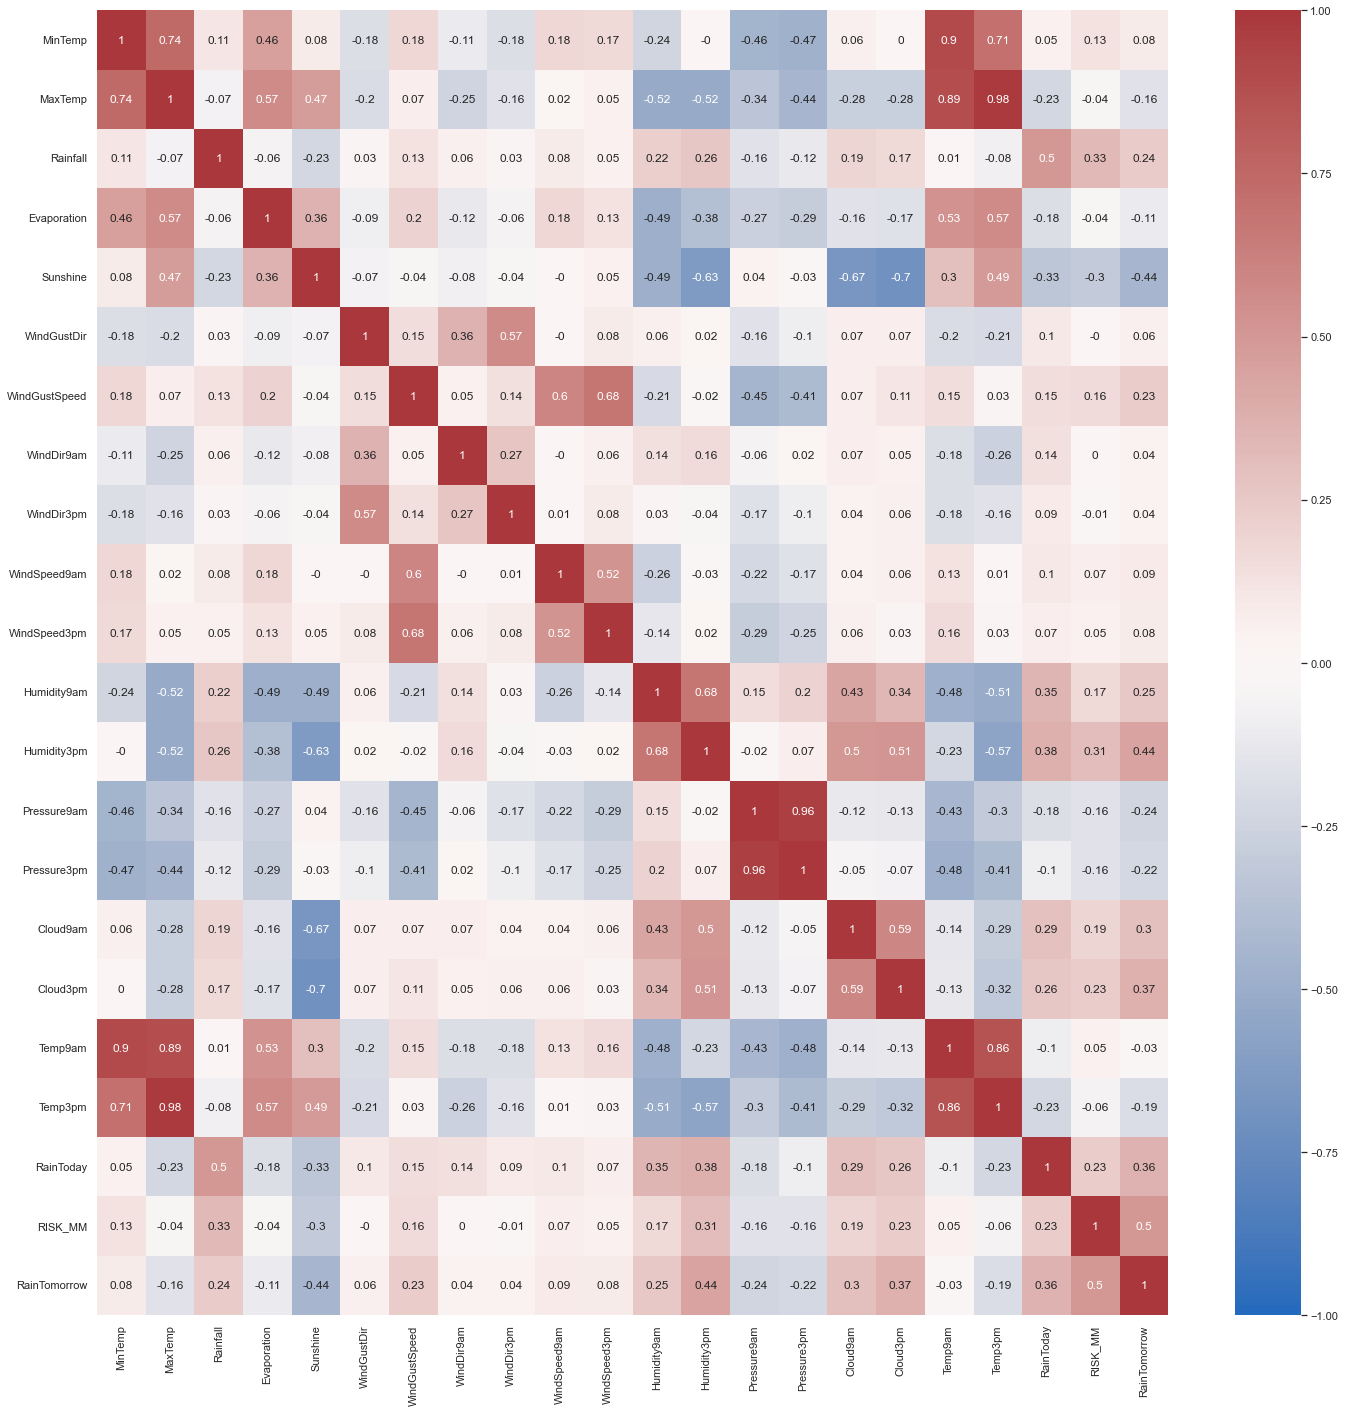

In [25]:
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True,vmax=1, vmin=-1, center=0, cmap='vlag')
sns.set(rc={'figure.figsize':(24,24)})
plt.show()